In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('diamonds.csv')

In [2]:
#количество строк
df.shape[0]

53940

In [3]:
#количество столбцов
df.shape[1]

11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
#1. unnamed (0, None): индекс, не является каким-либо типом данных

#2. carat: карат, вес бриллианта; числовой непрерывный

#3. cut: качество огранки; категориальный порядковый

#4. color: цвет бриллианта, от J (худший) и до D (лучший); категориальный порядковый

#5. clarity: показатель того, насколько чист бриллиант (наличие внутренних и внешних дефектов); категориальный порядковый 
#  - I1 – включения видны невооружённым глазом (наихудшая чистота),   
#  - SI2, SI1 – небольшие включения,   
#  - VS2, VS1 – очень небольшие включения,   
#  - VVS2, VVS1 – очень-очень небольшие включения,   
#  - IF – идеальная чистота, дефектов нет (лучший уровень)

#6. depth: глубина, общая глубина в процентах = z / среднее значение (x, y) = 2 * z / (x + y); числовой непрерывный

#7. table: ширина верхней части бриллианта относительно самой широкой части; числовой непрерывный

#8. price: цена в долларах США; числовой дискретный

#9. x: длина в мм; числовой непрерывный

#10. y: ширина в мм; числовой непрерывный

#11. z: высота в мм; числовой непрерывный

In [6]:
df.isna().sum()
# пропусков в данных нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
#В случае если в датасете были бы пропуски, то мы использовали бы следующие способы.
# 1) Если бы пропуски в колонке составляли больше 40% данных, то мы бы удалили колонку
# 2) Если бы пропуски составляли меньше 40% данных, то мы бы удалили строчки с пропусками 
#    в случае большого количества данных, иначе - мы бы их заменили следующим образом:
#Для категориальных (в примере - порядковых):
df['clarity'].fillna(df['clarity'].mode()[0])

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object

In [8]:
#Для числовых (в примере - дискретных):
df['price'].fillna(df['price'].median())

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [9]:
#Удаление колонок, если больше 40% пропусков:
# df.drop('название_колонки', axis = 1, inplace = True)

In [10]:
#Удаление строчек, если меньше 40% пропусков:
# df.dropna(inplace = True)

In [11]:
df.shape[0] - df.drop_duplicates().shape[0]
#В данных нет полных дубликатов

0

In [12]:
# Ниже представлен способ для обнаружения выбросов с помощью ящика с усами
# Метод, который используется в данном случае, - это метод 1,5IQR.
# Также есть способы 1std, 2std, 3std

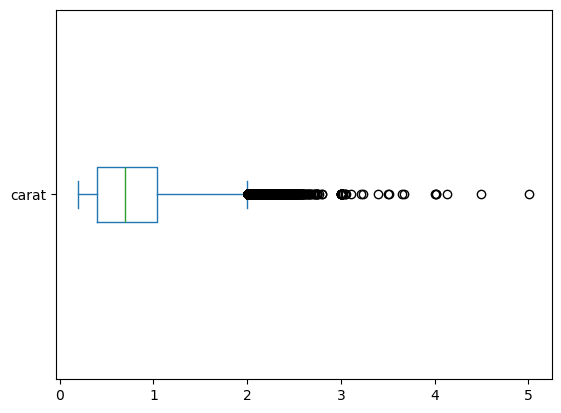

In [13]:
df['carat'].plot(kind = 'box', vert = False);
#выбросы есть

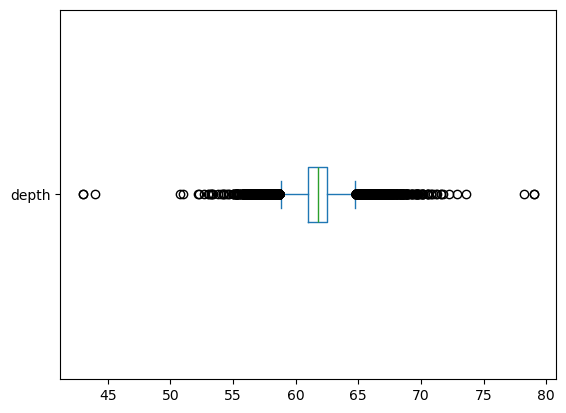

In [14]:
df['depth'].plot(kind = 'box', vert = False);
#выбросы есть

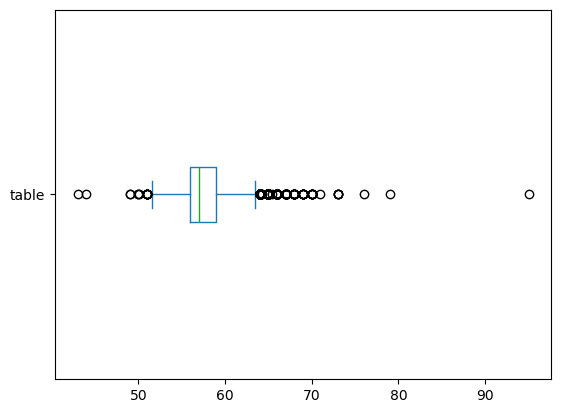

In [15]:
df['table'].plot(kind = 'box', vert = False);
#выбросы есть

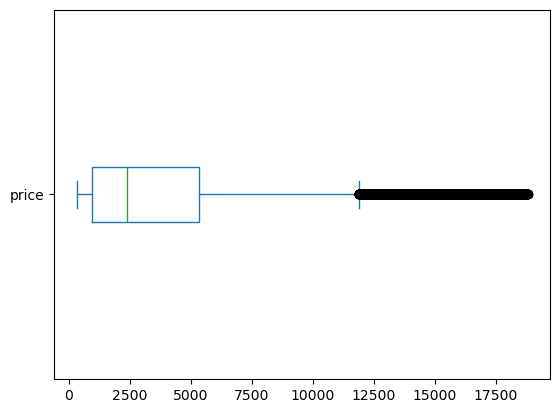

In [16]:
df['price'].plot(kind = 'box', vert = False);
#выбросы есть

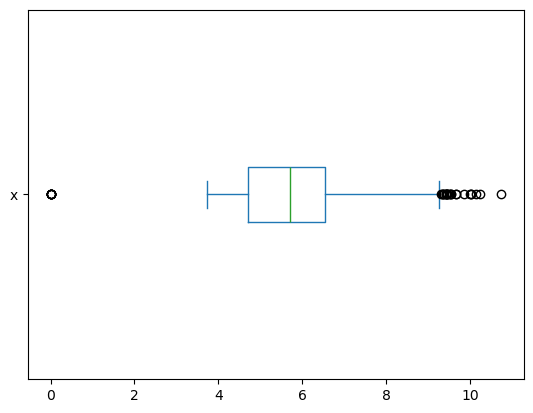

In [17]:
df['x'].plot(kind = 'box', vert = False);
#выбросы есть

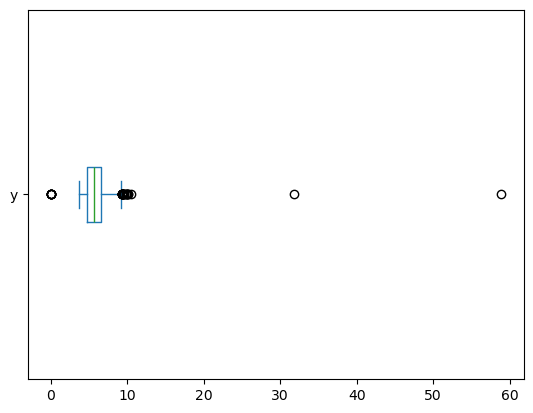

In [18]:
df['y'].plot(kind = 'box', vert = False);
#выбросы есть

<Axes: >

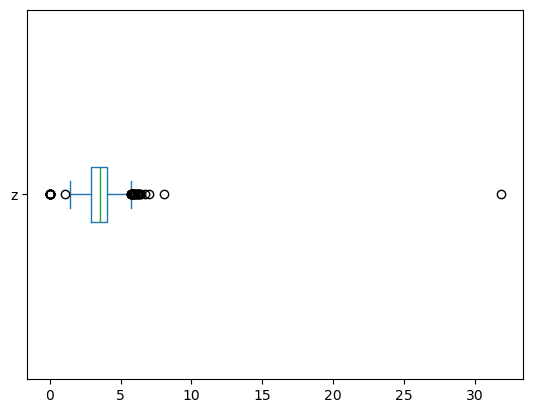

In [19]:
df['z'].plot(kind = 'box', vert = False)
#выбросы есть

In [20]:
# На примере столбца 'price' посчитаем выбросы методом 3std
price_mean = df['price'].mean()
price_std = df['price'].std()
df[(df['price'] < price_mean - 3 * price_std) | (df['price'] > price_mean + 3 * price_std)].shape[0]

1206

In [21]:
# На примере столбца 'price' посчитаем выбросы методом 1,5IQR
price_median = df['price'].median()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
df[(df['price'] < price_median - 1.5 * price_iqr) | (df['price'] > price_median + 1.5 * price_iqr)].shape[0]

6346

In [22]:
# На примере столбца 'depth' посчитаем выбросы методом 3std
depth_mean = df['depth'].mean()
depth_std = df['depth'].std()
df[(df['depth'] < depth_mean - 3 * depth_std) | (df['depth'] > depth_mean + 3 * depth_std)].shape[0]

685

In [23]:
# На примере столбца 'depth' посчитаем выбросы методом 1,5IQR
depth_median = df['depth'].median()
depth_iqr = df['depth'].quantile(0.75) - df['depth'].quantile(0.25)
df[(df['depth'] < depth_median - 1.5 * depth_iqr) | (df['depth'] > depth_median + 1.5 * depth_iqr)].shape[0]

5372

In [24]:
# На примере столбца 'carat' посчитаем выбросы методом 3std
carat_mean = df['carat'].mean()
carat_std = df['carat'].std()
df[(df['carat'] < carat_mean - 3 * carat_std) | (df['carat'] > carat_mean + 3 * carat_std)].shape[0]

439

In [25]:
# На примере столбца 'carat' посчитаем выбросы методом 1,5IQR
carat_median = df['carat'].median()
carat_iqr = df['carat'].quantile(0.75) - df['carat'].quantile(0.25)
df[(df['carat'] < carat_median - 1.5 * carat_iqr) | (df['carat'] > carat_median + 1.5 * carat_iqr)].shape[0]

2968

In [26]:
# Для удаления выбросов в колонках 'price', 'carat' и 'depth' воспользуемся методом 3std,
# чтобы не терять в большом количестве интересные для анализа данные.
# В других колонках удалим выбросы с помощью метода 1,5IQR

table_median = df['table'].median()
table_iqr = df['table'].quantile(0.75) - df['table'].quantile(0.25)
dfc = df[(df['table'] >= table_median - 1.5 * table_iqr) & (df['table'] <= table_median + 1.5 * table_iqr)]

x_median = df['x'].median()
x_iqr = df['x'].quantile(0.75) - df['x'].quantile(0.25)
dfc = dfc[(dfc['x'] >= x_median - 1.5 * x_iqr) & (dfc['x'] <= x_median + 1.5 * x_iqr)]

y_median = df['y'].median()
y_iqr = df['y'].quantile(0.75) - df['y'].quantile(0.25)
dfc = dfc[(dfc['y'] >= y_median - 1.5 * y_iqr) & (dfc['y'] <= y_median + 1.5 * y_iqr)]

z_median = df['z'].median()
z_iqr = df['z'].quantile(0.75) - df['z'].quantile(0.25)
dfc = dfc[(dfc['z'] >= z_median - 1.5 * z_iqr) & (dfc['z'] <= z_median + 1.5 * z_iqr)]

price_mean = df['price'].mean()
price_std = df['price'].std()
dfc[(dfc['price'] >= price_mean - 3 * price_std) & (dfc['price'] <= price_mean + 3 * price_std)]

depth_mean = df['depth'].mean()
depth_std = df['depth'].std()
dfc[(dfc['depth'] >= depth_mean - 3 * depth_std) & (dfc['depth'] <= depth_mean + 3 * depth_std)]

carat_mean = df['carat'].mean()
carat_std = df['carat'].std()
dfc[(dfc['carat'] >= carat_mean - 3 * carat_std) & (dfc['carat'] <= carat_mean + 3 * carat_std)]

dfc

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
dfc.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,50937.000000,50937.000000,50937.000000,50937.000000,50937.000000,50937.000000,50937.000000,50937.000000
mean,27094.285372,0.777866,61.813299,57.192587,3819.814104,5.689583,5.692845,3.517892
std,15542.407354,0.449440,1.330302,1.868769,3867.543247,1.091931,1.085123,0.675776
min,1.000000,0.200000,43.000000,52.800000,326.000000,3.730000,3.680000,2.060000
25%,13657.000000,0.390000,61.100000,56.000000,932.000000,4.690000,4.700000,2.900000
50%,27350.000000,0.700000,61.900000,57.000000,2336.000000,5.670000,5.680000,3.510000
75%,40516.000000,1.040000,62.500000,59.000000,5235.000000,6.520000,6.520000,4.030000
max,53940.000000,2.300000,78.200000,61.500000,18818.000000,8.440000,8.440000,5.220000


In [28]:
# Рассмотрим признак price
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [29]:
# Проинтерпретируем описательные статистики колонки price, дополнительно посчитаем медиану и моду, среднее возьмем из таблицы ()
med_price = dfc['price'].median()
mode_price = dfc['price'].mode()[0]
avg_price = dfc.describe()['price']['mean']
med_price, mode_price, avg_price

(2336.0, 605, 3819.8141036967236)

In [30]:
dfc['price'].value_counts()
# Мода одна

price
605      130
802      126
625      125
828      123
776      122
        ... 
8523       1
14196      1
8525       1
14190      1
9532       1
Name: count, Length: 11171, dtype: int64

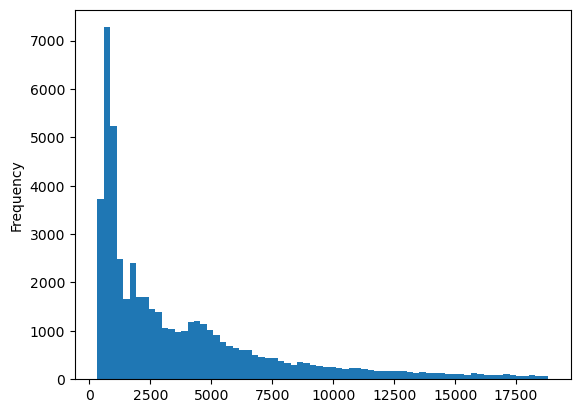

In [31]:
dfc['price'].plot(kind='hist', bins=70);

In [32]:
# Распределение цены бриллиантов является унимодальным скошенненным вправо, так как мода < медиана < среднее арифметическое и мода одна.
# Средняя цена бридллианта 3820 долларов, среднее значение получилось значительно больше, чем медиана, потому что в выборке присутствуют очень дорогие бриллианты,
# которые не были исключены как выбросы методом 3std.
# Размах вариации очень большой: 18818 - 326 = 18492
# 50% бриллиантов из выборки по цене находятся в дипазоне между 932 и 5235 долларами (5325 - 932 = 4393 - интерквартильный размах)
# Выборка неоднородна, так как коэффициент вариации std / mean * 100% = 101.3% что больше чем 33%
# Квартильный коэффициент дифференцации Kq =  q3 / q1 = 5.71, высокая степень дифференицации

In [33]:
# Теперь проанализируем категориальную переменную 'color'.
# У категориальной порядковой переменной можно посчитать моду; если она закодирована цифрами и количество категорий нечетное, то можно еще посчитать медиану
# У нас 'color' закодирован буквами, поэтому определяем только моду
# Также посчитаем количесвто категорий у признака.

In [34]:
# Основные характеристики признака
dfc['color'].describe()

count     50937
unique        7
top           G
freq      10824
Name: color, dtype: object

In [35]:
# Мода
dfc['color'].mode()[0]

'G'

In [36]:
# Количсевто уникальных значений признака
dfc['color'].nunique()

7

In [37]:
# Выведем эти категории и соответствующие частоты
dfc['color'].value_counts()

color
G    10824
E     9295
F     9069
H     7785
D     6446
I     5008
J     2510
Name: count, dtype: int64

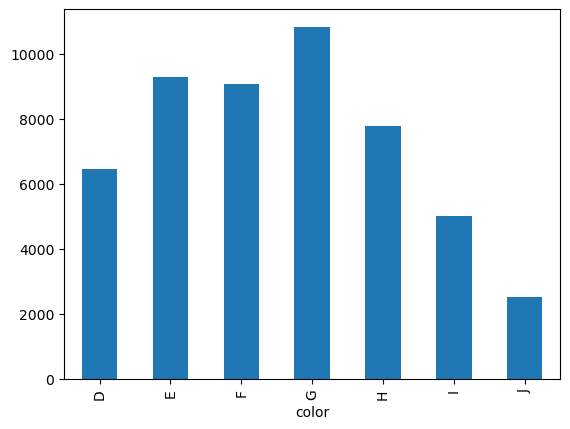

In [38]:
# Если посмотреть на "распределение" брриллиантов по цвету, можно отметить, что бóльшее число бриллиантов относится к "средним" по качеству цвета категориям;
# при этом минимальное количесвто бриилиантов из выборки попали в категорию J (худшую из представленных) 
dfc['color'].value_counts().sort_index().plot(kind='bar');

In [39]:
# Теперь перейдем к визуализации
from matplotlib import pyplot as plt

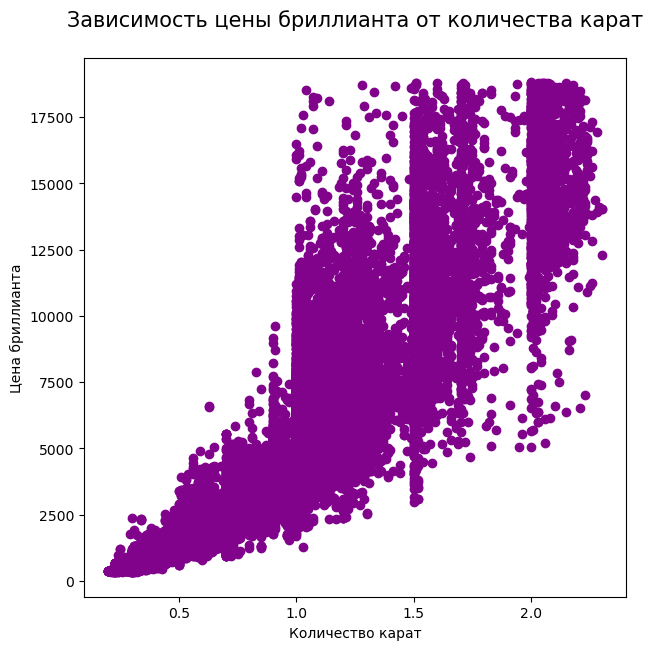

In [40]:
# Диаграмма рассеяния: зависимость цены бриллианта от количества карат

plt.figure(figsize=[7, 7])
plt.scatter(dfc['carat'], dfc['price'], c='#81038c')
plt.title('Зависимость цены бриллианта от количества карат\n', fontsize=15)
plt.xlabel('Количество карат')
plt.ylabel('Цена бриллианта')
plt.show()

# Можем наблюдать не очень явную прямую зависимость между количесвтом карат и ценой бриллианта при малом количесвте карат (до 1). Далее, с увеличением
# количества карат, зависимость теряется, что особенно заметно при количесвте карат, равном 1, 1.5 и 2 (прослеживаются "вертикальные линии на графике
# на уровне соответствующих значений")

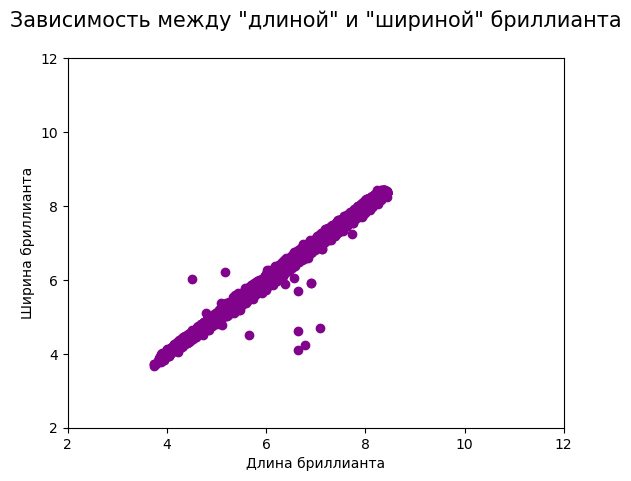

In [41]:
# Диаграмма рассеяния: зависимость между "длиной" и "шириной" бриллианта

plt.scatter(dfc['x'], dfc['y'], c='#81038c')
plt.xticks([2, 4, 6, 8, 10, 12])
plt.yticks([2, 4, 6, 8, 10, 12])
plt.title('Зависимость между "длиной" и "шириной" бриллианта\n', fontsize=15)
plt.xlabel('Длина бриллианта')
plt.ylabel('Ширина бриллианта')
plt.show()

# Наблюдаем ярко выраженную линейную прямую зависимость между "длиной" и "шириной" бриллианта. Это говорит о том, что в основной массе "шапка" бриллиантов
# имеют округлую форму.

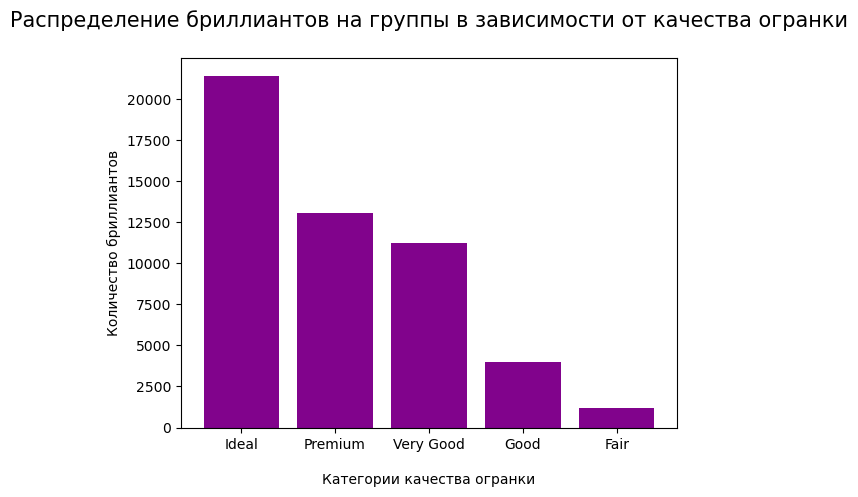

In [42]:
# Столбчатая диаграмма: качесвто огранки бриллиантов

plt.bar(dfc['cut'].value_counts().index, dfc['cut'].value_counts(), color='#81038c')
plt.title('Распределение бриллиантов на группы в зависимости от качества огранки\n', fontsize=15)
plt.xlabel('\nКатегории качества огранки')
plt.ylabel('Количество бриллиантов')
plt.show()

# Можно отметить, что чаще всего бриллианты являются идеальными по огранке. И в целом бриллианты с относительно некачесвтенной огранкой (Good, Fair)
# встречаются редко.

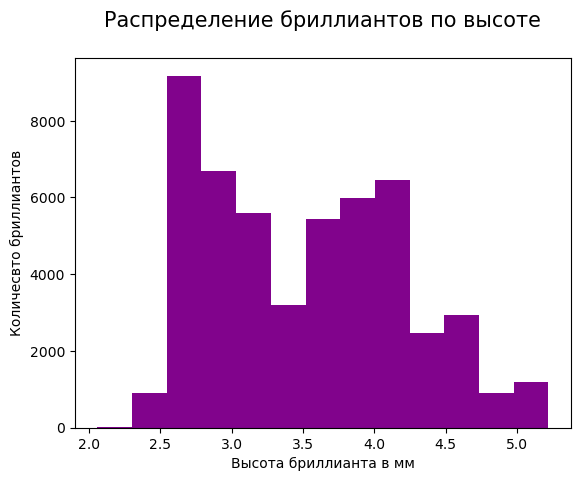

In [43]:
# Гистограмма для признака высота бриллианта

plt.hist(dfc['z'], bins=13, color='#81038c')
plt.title('Распределение бриллиантов по высоте\n', fontsize=15)
plt.xlabel('Высота бриллианта в мм')
plt.ylabel('Количесвто бриллиантов')
plt.show()

# График не похож на нормальное распределение.
# Можно отметить, что самыми популярными являются бриллианты с высотой в интервале примерно 2.6 - 2.8 мм, также не редкость - бриллианты с высотой в
# в интервале 4 - 4.2 мм. В то время как остальные интервалы являются относительно нечастыми.

In [44]:
# Построим матрицу корреляций
dfc.drop(columns='Unnamed: 0').corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.035083,0.189713,0.922245,0.981141,0.980358,0.980293
depth,0.035083,1.000000,-0.227261,-0.010541,-0.013195,-0.017038,0.100035
table,0.189713,-0.227261,1.000000,0.143468,0.194540,0.189815,0.165573
price,0.922245,-0.010541,0.143468,1.000000,0.884878,0.886280,0.879715
x,0.981141,-0.013195,0.194540,0.884878,1.000000,0.998673,0.992720
y,0.980358,-0.017038,0.189815,0.886280,0.998673,1.000000,0.992271
z,0.980293,0.100035,0.165573,0.879715,0.992720,0.992271,1.000000


In [45]:
# 1) Очень сильная корреляция (прямая весьма высокая) наблюдается между признаками, характеризующими размер бриллианта (x, y, z),
# и весом этого бриллианта в каратах (corr>0.98), что интуитивно понятно.
# 2) Также очень сильна линейная зависимость (прямая весьма высокая корреляция) наблюдаетмся между ценой бриллианта и количеством карат (corr>0.92),
# что несколько противоречит выводам, полученным из анализа диаграммы рассеяния выше.
# 3) Еще одна ожидаемо высокая корреляция (высокая прямая) наблюдается между ценой бриллианта и его размерами (0.87<corr<0.89).
# 4) Самые сильные линейные зависимости (прямая весьма высокая корреляция) наблюдаются между признаками, характеризующими длину, ширину и
# высоту бриллианта (corr>0.99), что тоже неудивительно.
# 5) Из интересного: можем набюдать, что между глубиной ('depth'), которая характеризует "вытянутость" бриллианта, и признаком 'table', который
# представляет собой отношение диаметра верхней части бриллианта к диаметру его самой широкой части, существует слабая обратная корреляция, что тоже
# можно назвать ожидаемым результатом (визуально представьте себе вытянутый и сплющенный бриллианты)
# 6) Между остальными признаками корреляции либо нет, либо она слабая.

In [46]:
'''
Обзор литературы на тему: 
1) Статья "Факторы влияющие на формирование цены на продукцию алмазодобывающей отрасли" (Анисимова Алла Борисовна, Патрушева Елена Владимировна)
В статье авторы выделяют основные факторы, которые определяют цену алмазов. Среди них: себестоимость производства и инвестиционные вложения,
установленная конкурентами цена, качество продукции. Также в статье рассмотрены курпнейшие компании, специализирующиеся на производстве алмазов,
и страны-лидеры в этой отрасли. Для формулирования гипотезы наибольший интерес представляет собой финальная часть работы, где авторы отмечают большую
роль качесвта продукции в формировании цен на бриллианты. В рамках проекта будет проверено, насколько качество сырья (признаки 'color' и 'clarity') влияют
на ценообразование в отрасли
2) Статья "Особенности формирования цены на бриллианты" (Борздова Т.В.). В статье также рассмотрены факторы, влияющие на ценообразование в рассматриваемой
отрасли, однако автор анализирует влияние на цену бриллиантов, а не алмазов, что еще более релевантно в нашем случае. Основные выделенные в статье
факторы: вес, цвет, чистота и огранка бриллианта. Также в статье рассмотрена привлекательность инвестиций в производство бриллиантов, что, однако, не
интересует нас в этом проекте. Наибольший интерес представляет утверждение: на цену бриллиантов влияет не непосредственно вес, а весовая категория,
к которой относится бриллиант. Поэтому, согласно статье, алмазы зачастую специально гранят так, чтобы они попали в более высокую весовую категорию. В
рамках проекта мы проверим, насколько качество огранки ('cut') хуже у тех бриллиантов, которые находятся на границе между весовыми категориями (использовать
будем признак 'carat'). Гипотеза заключается в том, что качество огранки хуже у тех бриллиантов, которые принадлежат к нижним границам весовых категорий).
Также в статье утверждается, что размер бриллиантов нелинейно влияет на их цену, так как большие бриллианты очень редки, что объясняет
дополнительную наценку (будем использовать признаки 'price' и 'carat'). Метод - расчет корреляции между признаками и поиск нелинейной взаимосвязи.
'''

'\nОбзор литературы на тему: \n1) Статья "Факторы влияющие на формирование цены на продукцию алмазодобывающей отрасли" (Анисимова Алла Борисовна, Патрушева Елена Владимировна)\nВ статье авторы выделяют основные факторы, которые определяют цену алмазов. Среди них: себестоимость производства и инвестиционные вложения,\nустановленная конкурентами цена, качество продукции. Также в статье рассмотрены курпнейшие компании, специализирующиеся на производстве алмазов,\nи страны-лидеры в этой отрасли. Для формулирования гипотезы наибольший интерес представляет собой финальная часть работы, где авторы отмечают большую\nроль качесвта продукции в формировании цен на бриллианты. В рамках проекта будет проверено, насколько качество сырья (признаки \'color\' и \'clarity\') влияют\nна ценообразование в отрасли\n2) Статья "Особенности формирования цены на бриллианты" (Борздова Т.В.). В статье также рассмотрены факторы, влияющие на ценообразование в рассматриваемой\nотрасли, однако автор анализирует влия

#### KT3

**Гипотеза для проверки с помощью критерия независимости хи-квадрат**

Мы хотим определить, есть ли зависимость между весом бриллианта (в каратах) и его чистотой (прозрачностью). Мы предполагаем, что чистота бриллианта никак не связана с его весом в каратах: маленький вес не гарантирует идеальную прозрачность бриллианта и, наоборот, если он обладает большим весом, то это не значит, что он имеет много включений. 

Нулевая гипотеза $ H_0 $ : вес бриллианта (в каратах) **не зависит** от его чистоты

Разделим бриллианты на 2 категории по их весу в каратах: 'Small' и 'Big'. Будем считать, что если вес бриллианта в каратах меньше медианного значения, то тогда он будет относится в категорию 'Small', иначе - в категорию 'Big', и запишем данные значения в новый столбец 'carat_cat'

In [52]:
med_car = dfc['carat'].median()

In [53]:
dfc['carat_cat'] = dfc['carat'].apply(lambda x: 'Small' if x < med_car else 'Big') 


Разделим бриллианты на 3 категории по их чистоте. К категории 'Bad' относятся бриллианты с заметными включениями (группы I1, SI2, SI1). К категории 'Normal' принадлежат бриллианты с очень небольшими включениями (группы VS2, VS1). К категории 'Good' относятся бриллианты с чистотой близкой к идеальной или идеальной (группы VVS2, VVS1, IF).

In [55]:
dfc['clarity_cat'] = dfc['clarity'].apply(lambda x: 'Bad' if x in ['I1','SI2','SI1'] else ('Normal' if x in ['VS2', 'VS1'] else 'Good')) 
dfc

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat,clarity_cat
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Small,Bad
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Small,Bad
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Small,Normal
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Small,Bad
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Small,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Big,Bad
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Big,Bad
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Big,Bad
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Big,Bad


Создадим таблицу, показывающую, какое количество бриллиантов в зависимости от степени чистоты являются большими или маленькими по своему весу в каратах.

In [57]:
pivot_table = dfc.groupby('carat_cat')['clarity_cat'].value_counts().unstack()
pivot_table = pivot_table.reindex(columns = ['Bad', 'Normal', 'Good'])
pivot_table = pivot_table.sort_index(ascending = False)
pivot_table

clarity_cat,Bad,Normal,Good
carat_cat,,,
Small,6577,10238,7607
Big,14616,9285,2614


Проверим нулевую гипотезу

In [59]:
from scipy.stats import chi2_contingency
result1 = chi2_contingency(pivot_table.values)
result1

Chi2ContingencyResult(statistic=5458.215485752944, pvalue=0.0, dof=2, expected_freq=array([[10161.09009168,  9360.40021988,  4900.50968844],
       [11031.90990832, 10162.59978012,  5320.49031156]]))

Так как p-value < α при любом уровне значимости => **Нулевая гипотеза отвергается на любом уровне значимости.**

Значит, существует взаимосвязь между весом бриллианта в каратах и его чистотой. Если бриллиант имеет достаточно большой вес, то, скорее всего, показатели его чистоты будут невысокими. Наоборот, если же бриллиант обладает небольшим весом, то, скорее всего, он будет обладать более высокими показателями прозрачности.

**Гипотеза для проверки с помощью двухвыборочного t-теста**

Обычно на фотографиях бриллиантов их длина и ширина кажется примерно одинаковой, поэтому мы хотим проверить гипотезу о равенстве средних значений длины и ширины бриллианта, при этом дисперсии этих показателей неравны между собой.

In [64]:
print(dfc['x'].var() == dfc['y'].var())

False


**Нулевая гипотеза $ H_0 $ :** математическое ожидание длины бриллианта равно математическому ожиданию ширины бриллианта.

**Альтернативная гипотеза $ H_1 $ :** математическое ожидание длины бриллианта не равно математическому ожиданию ширины бриллианта.

In [67]:
from scipy import stats
result3 = stats.ttest_ind(a=dfc['x'], 
                         b=dfc['y'], 
                         equal_var=False) 
result3

TtestResult(statistic=-0.4783346467210453, pvalue=0.6324130669622323, df=101868.015396511)

Так как p-value > α при α = 1%, и α = 5%, и α = 10% => **Нулевая гипотеза принимается на данных уровнях значимости.**

Значит, фотографии в Интернете похожи на реальность: в действительности бриллиант имеет в среднем практически одинаковые показатели длины и ширины.

**Гипотеза для проверки с помощью одновыборочного t-теста**

Опираясь на полученную при проверке предыдущей гипотезы информацию о том, что большая часть бриллиантов имеет круглую форму в верхней части (или, по крайне мере, правильную форму, с равными длиной и шириной), протестируем гипотезу о том, что математическое ожидание значения признака 'depth' (глубина алмаза) равняется идеальной глубине круглых бриллиантов. Мы нашли информацию, что для круглых бриллиантов идеальный диапазон значения для глубины попадает в интервал от 59 до 62,3. Для тестирования гипотезы найдем среднее интервала: (59 + 62,3) / 2 = 60,65.

**Нулевая гипотеза $ H_0 $ :** математическое ожидание значения глубины бриллианта равняется 60,65.

**Альтернативная гипотеза $ H_1 $ :** математическое ожидание значения глубины бриллианта не равняется 60,65.

In [74]:
from scipy import stats
result2 = stats.ttest_1samp(a=dfc['depth'],                 
                           popmean = 60.65,           
                           alternative='two-sided')  
result2

TtestResult(statistic=197.35935365766488, pvalue=0.0, df=50936)

Так как p-value < α при любом уровне значимости => **Нулевая гипотеза отвергается на любом уровне значимости**. Значит, на самом деле, математическое ожидание значения признака 'depth' отличается от 60.65. То есть мы не можем утверждать, что круглые бриллианты с идеальной огранкой (куда относится и показатель глубины) настолько сильно распространены, чтобы мы могли делать предположение о равенстве математического ожидания глубины бриллиантов в генеральной совокупности значению, характерному для идеально ограненных круглых бриллиантов.

## KT 4

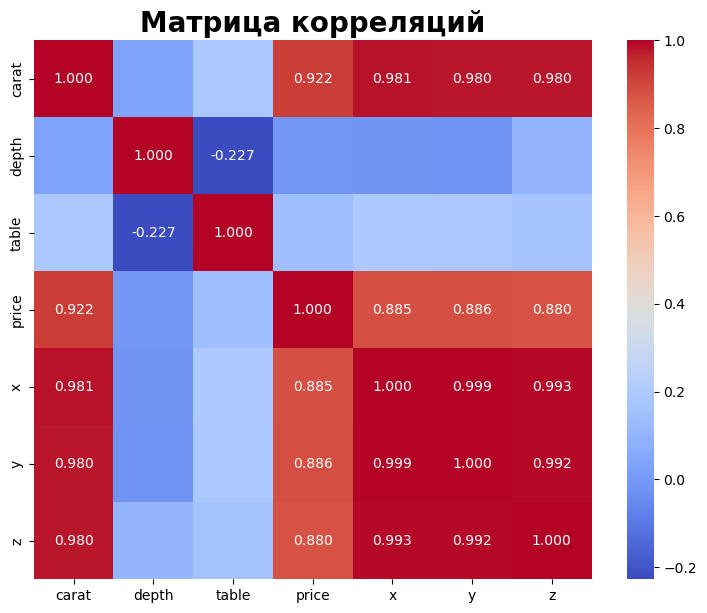

In [77]:
plt.figure(figsize=(9, 7))
cor_t = sns.heatmap(dfc.iloc[:, 1:].corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='0.3f')
plt.title('Матрица корреляций', fontsize = 20, fontweight = 'bold')

for i in cor_t.texts:
    if float(i.get_text()) >= 0.2 or float(i.get_text()) <= -0.2:
        i.set_text(i.get_text())
    else:
        i.set_text('')
        
plt.show()

При построении регрессии будем исполльзовать как целевую переменную цену бриллианта. В качестве регрессоров среди количесвтенных признаков используем только количество карат(carat). Признаки depth и table имеют слабую коррреляцию с ценой, поэтому их использовать не будем. А x, y и z, хоть и имеют весьма высокую корреляцию с целевой переменнной, также имеют весьма высокую корреляцию между собой и с количеством карат, что логично, поскольку бриллианты обычно симметричные и их вес напрямую зависит от их размера. Использование регрессоров, которые между собой коррелируют, приведет к проблемам в обучении модели.

Из категориальных признаков возьмем cut, color и clarity. Очевидно они тоже должны влиять на цену бриллианта.

In [80]:
X = dfc[['carat', 'cut', 'color', 'clarity']]
X

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
5,0.24,Very Good,J,VVS2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


Для построения регрессии на основе категорриальных признаков необходимо их предобработать. Будем использовать one-hot encoding.

In [82]:
X_dum = pd.get_dummies(X, drop_first=True, dtype=float)

In [83]:
X_dum

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
Y = dfc['price']

In [85]:
Y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 50937, dtype: int64

In [86]:
# Обучим модель
import statsmodels.api as sm

X_dum = sm.add_constant(X_dum)
model = sm.OLS(Y, X_dum).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 3.133e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:28:15   Log-Likelihood:            -4.2959e+05
No. Observations:               50937   AIC:                         8.592e+05
Df Residuals:                   50918   BIC:                         8.594e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6838.2420     55.561   -123.077      0.000   -6947.141   -6729.343
carat          9025.4113     12.394    728.210      0.000    9001.119    9049.704
cut_Good        670.6311     37.003     18.124      0.000     598.105     743.157
cut_Ideal       961.8514     33.702     28.540      0.000     895.794    1027.908
cut_Premium     832.0351     33.993     24.477      0.000     765.409     898.661
cut_Very Good   815.3550     34.337     23.746      0.000     748.054     882.656
color_E        -221.9295     18.081    -12.274      0.000    -257.369    -186.490
color_F        -334.1973     18.277    -18.285      0.000    -370.021    -298.374
color_G        -528.7561     17.872    -29.586      0.000    -563.786    -493.727
color_H       -1008.6844     19.077    -52.874      0.000   -1046.076    -971.293
color_I       -1482.7118     21.493    -68.985      0.000   -1524.839   -1440.585
color_J       -2340.9340     26.846    -87.198      0.000   -2393.553   -2288.315
clarity_IF     4878.6007     54.399     89.682      0.000    4771.978    4985.223
clarity_SI1    2992.4497     47.786     62.621      0.000    2898.788    3086.112
clarity_SI2    2052.7889     48.097     42.680      0.000    1958.517    2147.060
clarity_VS1    3972.3689     48.597     81.740      0.000    3877.118    4067.620
clarity_VS2    3643.8856     47.966     75.967      0.000    3549.871    3737.900
clarity_VVS1   4531.5239     50.904     89.021      0.000    4431.752    4631.296
clarity_VVS2   4419.7351     49.749     88.841      0.000    4322.227    4517.243
==============================================================================
Omnibus:                    16290.973   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85446.169
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                       8.640   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Полученные параметры модели
model.params

const           -6838.242049
carat            9025.411321
cut_Good          670.631110
cut_Ideal         961.851368
cut_Premium       832.035102
cut_Very Good     815.355024
color_E          -221.929498
color_F          -334.197304
color_G          -528.756147
color_H         -1008.684422
color_I         -1482.711756
color_J         -2340.934018
clarity_IF       4878.600688
clarity_SI1      2992.449741
clarity_SI2      2052.788869
clarity_VS1      3972.368913
clarity_VS2      3643.885609
clarity_VVS1     4531.523929
clarity_VVS2     4419.735052
dtype: float64

In [89]:
# R^2 
model.rsquared

0.9171775589752179

In [90]:
# Сделаем предсказания на нашей выборке и посчитаем среднеквадратичную ошибку
pred = model.predict(X_dum)
MSE = sum((Y - pred)**2)/len(Y)
MSE

1238824.704854746

In [91]:
# Посчитаем среднеабсолютную ошибку
MAE = sum(abs(Y - pred))/len(Y)
MAE

795.0815345776621

## Выводы: 
Судя по высокому значению метрики R2, построенная регрессионная модель является качественной (почти 92% дисперсии цены бриллианта объясняется влиянием рассмотренных признаков: количеством карат, качеством огранки, цветом бриллианта и его "прозрачностью"). При этом можно заметить, что в наибольшей степени цена бриллианта определяется количеством карат. Также можно заметить, что clarity влияет на цену бриллианта сильнее, чем cut и color. При этом стоит отметить, что отрицательные значения параметров перед закодированными признаками color отрицательные по той причине, что "дропнут" был цвет D, который является лучшим из представленных в датасете. Поэтому модель штрафует за цвет бриллианта, который хуже, чем D (то есть за любой другой цвет). В случае закодированных cut и clarity, наоборот, "дропнута" самая плохая категория.
Метрики MSE и MAE не могут быть использованы в нашем случае для оценки качества модели, так как на основе данных метрик мы можем сравнивать модели, а не оценивать их в "абсолютных значениях". Также можем заметить, что MSE сильно больше MAE, что логично, так как целевая переменная (price) характеризуется очень высокими значениями признака, поэтому даже небольшое отклонение предсказания от правильного ответа в квадрате дает большую ошибку.

## Случайный лес

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
model1 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model1.fit(X_dum, Y)

RandomForestRegressor(max_depth=5, random_state=42)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = model1.predict(X_dum)

In [97]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [98]:
# Посчитаем R^2
r2 = r2_score(Y, Y_pred)
r2

0.910040309636723

In [99]:
# Посчитаем среднеквадратичную ошибку
mse = mean_squared_error(Y, Y_pred)
mse

1345580.8049627924

In [100]:
# Посчитаем среднеабсолютную ошибку
mae = mean_absolute_error(Y, Y_pred)
mae

612.8724728233941

## Выводы:
R^2 уменьшилось незначительно, теперь 91% дисперсии цены бриллианта объясняется влиянием рассмотренных признаков: количеством карат, качеством огранки, цветом бриллианта и его "прозрачностью". MAE уменьшилось, MSE увеличилось. Качество нелинейной модели приблизительно такое же, как и у линейной. Нельзя сделать вывод о том, что стало лучше, т.к. показатели R^2 и MSE выше у линейной модели, а MAE - у нелинейной. 

Главным преимуществом нелинейных моделей является то, что они описывают не только линейные, но и более сложные, нелинейные зависимости.

## Тест Чоу

**Нулевая гипотеза $ H_0 $ :** структурный сдвиг отсутствует

**Альтернативная гипотеза $ H_1 $ :** структурный сдвиг присутствует, модель неоднородна

In [113]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import train_test_split

def chow_test(X1, Y1, X2, Y2):
    X_concat = sm.add_constant(pd.concat([X1, X2], axis=0))
    Y_concat = pd.concat([Y1, Y2])
    
    model_combined = sm.OLS(Y_concat, X_concat).fit()
    model1 = sm.OLS(Y1, sm.add_constant(X1)).fit()
    model2 = sm.OLS(Y2, sm.add_constant(X2)).fit()
    
    ssr_combined = model_combined.ssr
    ssr1 = model1.ssr
    ssr2 = model2.ssr
    
    df_combined = len(Y_concat) - X_concat.shape[1]
    df1 = len(Y1) - X1.shape[1]
    df2 = len(Y2) - X2.shape[1]
    
    F_statistic = ((ssr_combined - (ssr1 + ssr2)) / (df_combined - df1 - df2)) / ((ssr1 + ssr2) / (df1 + df2))
    p_value = 1 - stats.f.cdf(F_statistic, df_combined - df1 - df2, df1 + df2)
    return p_value

X1, X2, Y1, Y2 = train_test_split(X_dum, Y, test_size=0.5, shuffle=True, random_state=0)
p_value = chow_test(X1, Y1, X2, Y2)
p_value

0.0034122095980431144

## Выводы:
Поскольку значение p-value < 0,05, мы можем отвергнуть нулевую гипотезу, в данных есть структурный сдвиг. Это означает, что при делении выборки на части можно получить результат лучше. Однако есть вероятность, что это обусловлено достаточно большим объёмом данных и разделением бриллиантов на "подкатегории", что заметно на графике "Зависимость цены бриллианта от количества карат" (см. КТ2)